<a href="https://colab.research.google.com/github/BhagwatiOracle/Real-Estate-Price-Prediction/blob/main/RealEstatePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('Real_Estate.csv')

In [ ]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [ ]:
df.isnull().sum()

,0
Transaction date,0
House age,0
Distance to the nearest MRT station,0
Number of convenience stores,0
Latitude,0
Longitude,0
House price of unit area,0


In [ ]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


# **EDA**

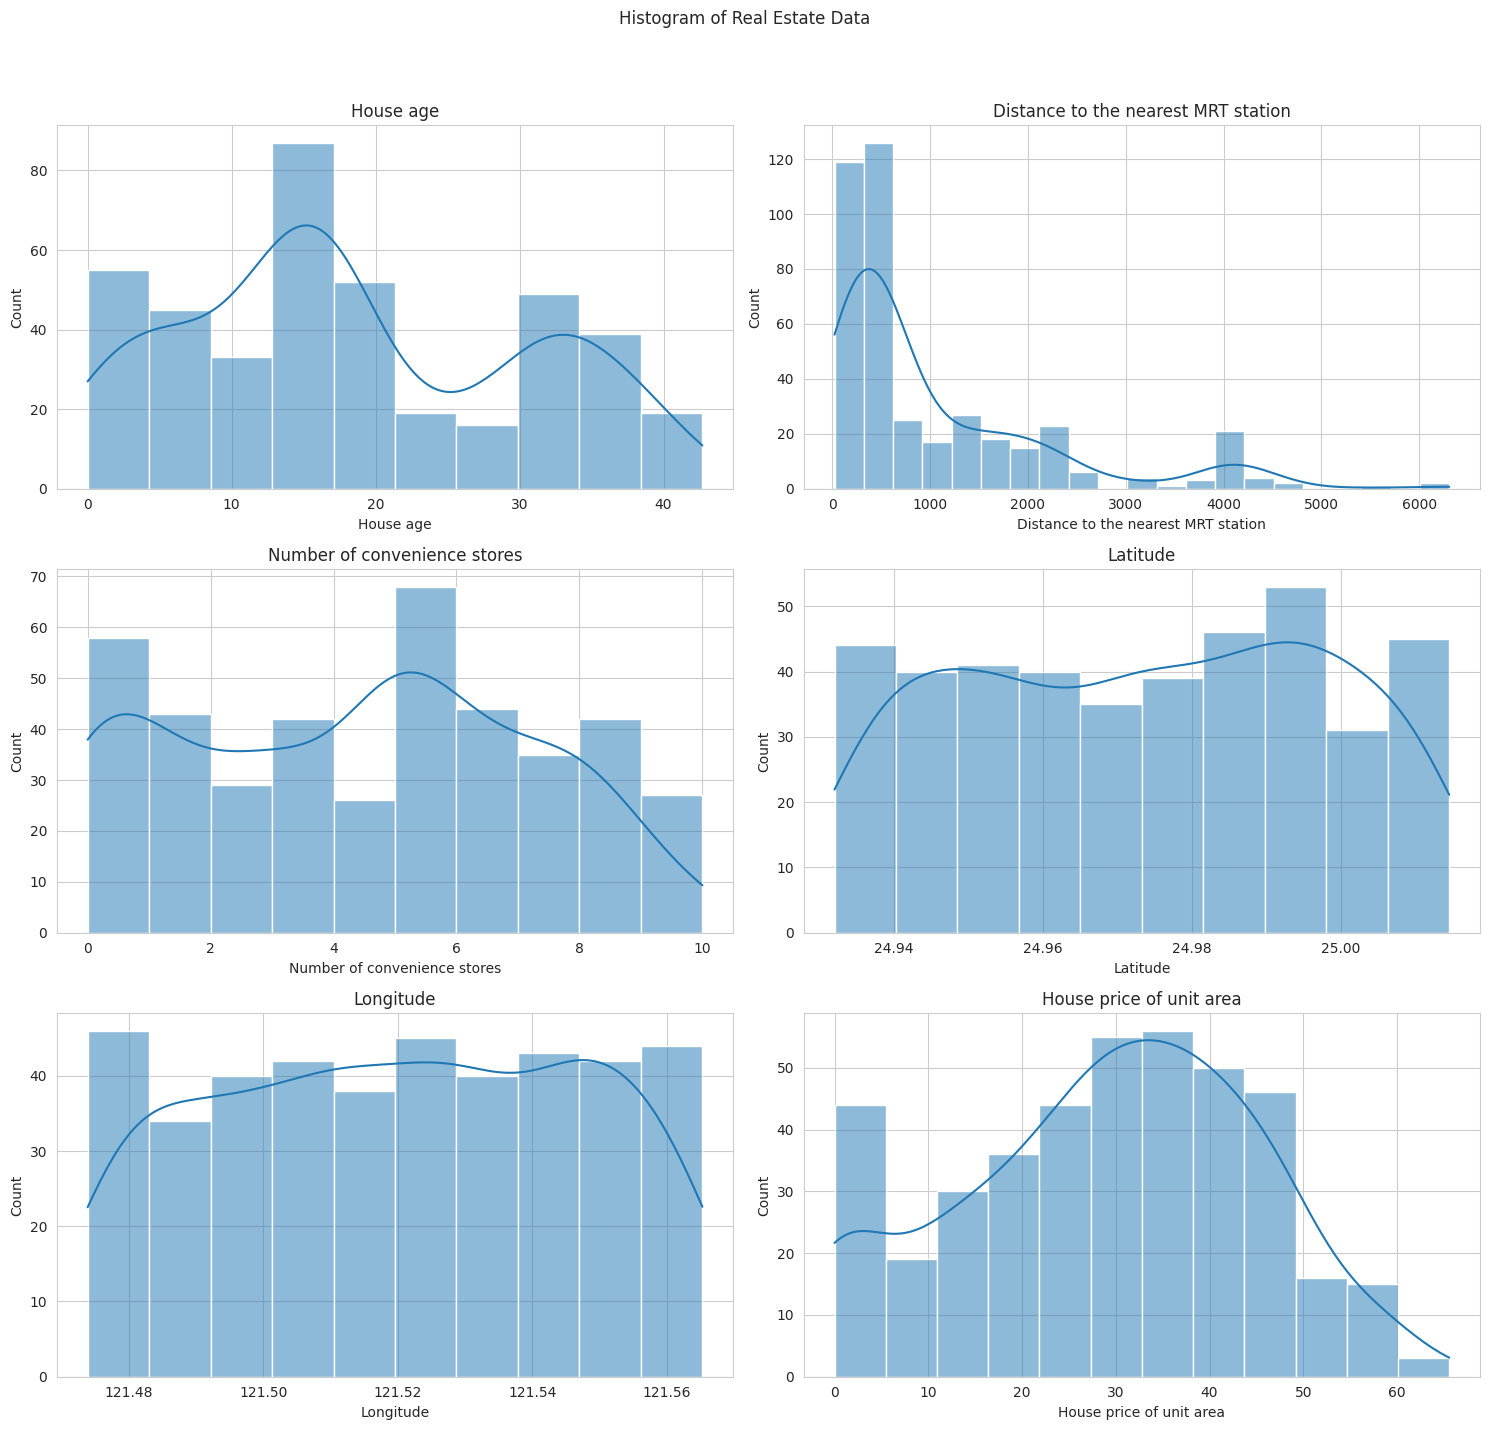

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(15,15))
fig.suptitle('Histogram of Real Estate Data')

cols=df.select_dtypes(include=['int64','float64'])
for i,col in enumerate(cols):
  sns.histplot(df[col],kde=True,ax=ax[i//2,i%2])
  ax[i//2,i%2].set_title(col)

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

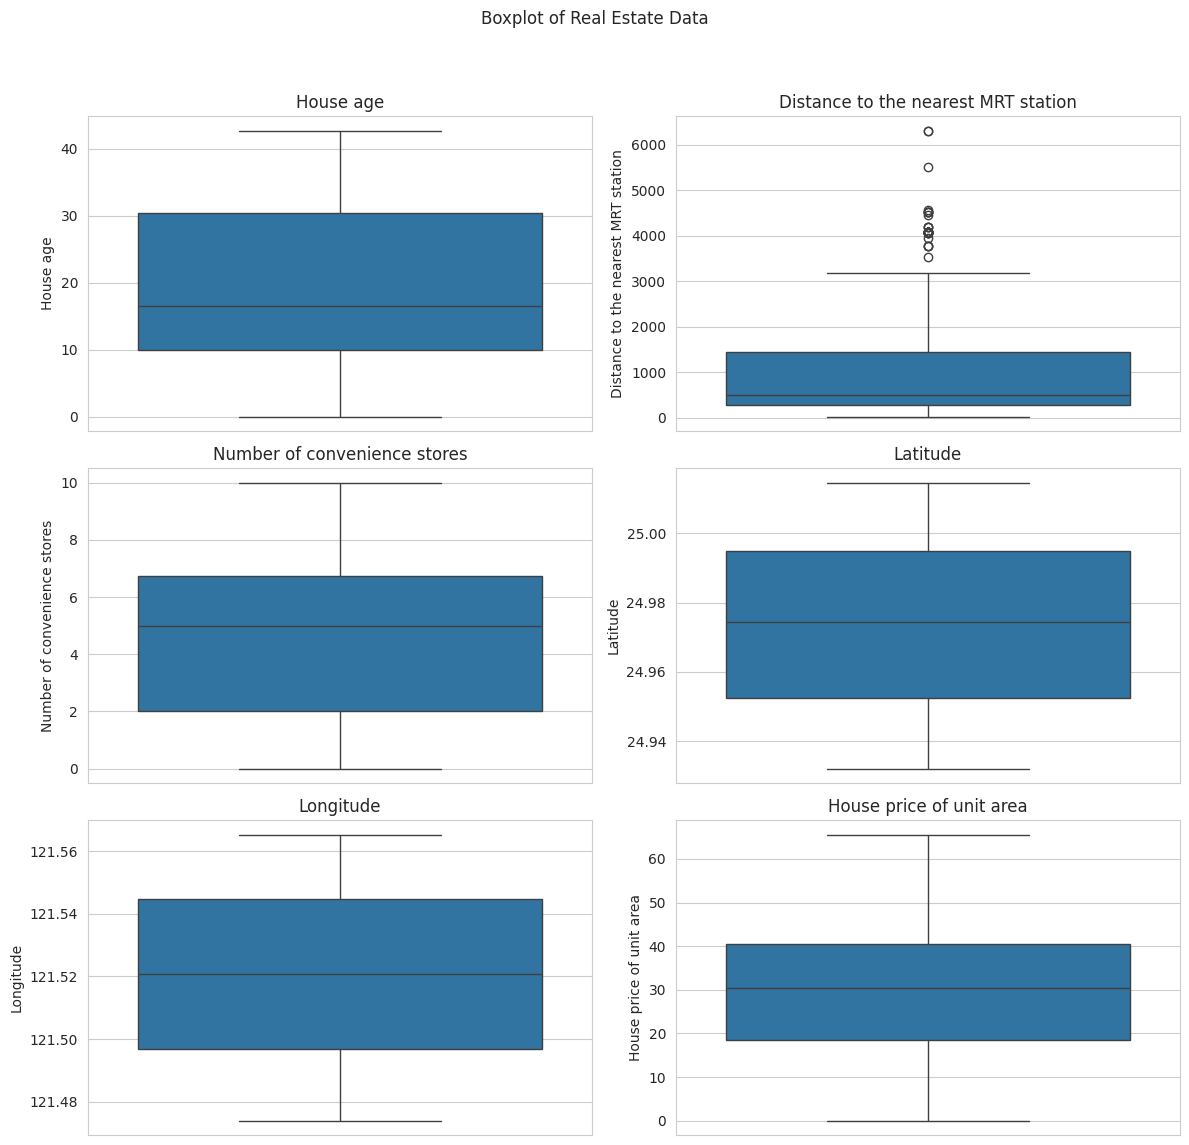

In [ ]:
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(12,12))
fig.suptitle('Boxplot of Real Estate Data')
for i,col in enumerate(cols):
  sns.boxplot(df[col],ax=ax[i//2,i%2])
  ax[i//2,i%2].set_title(col)

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()



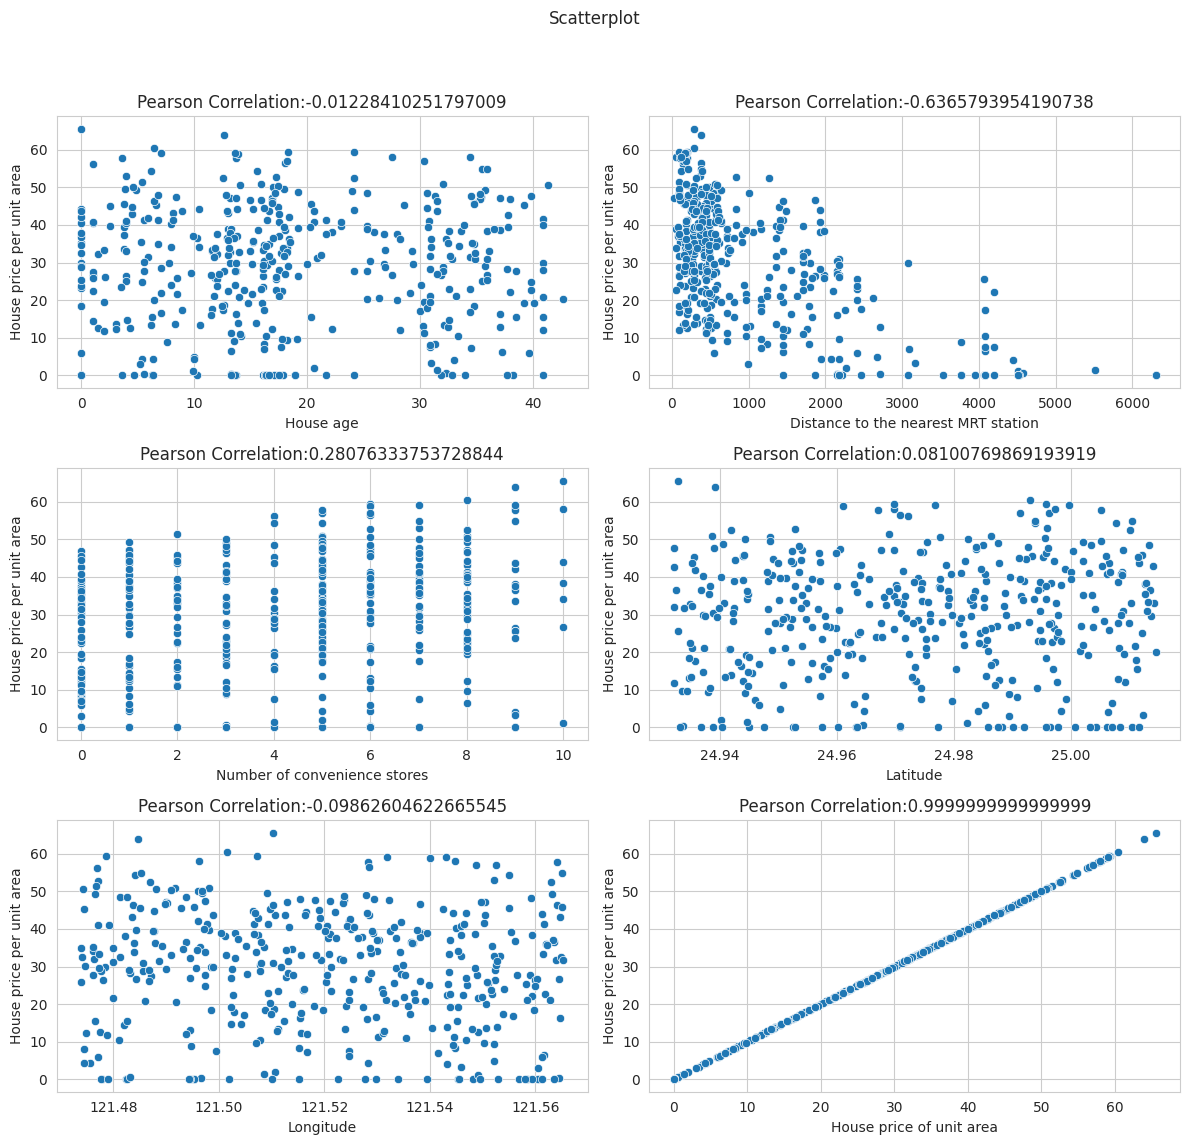

In [ ]:
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(12,12))
fig.suptitle('Scatterplot')

for i,col in enumerate(cols):
  sns.scatterplot(x=df[col],y=df['House price of unit area'],ax=ax[i//2,i%2])
  ax[i//2,i%2].set_xlabel(col)
  ax[i//2,i%2].set_ylabel('House price per unit area')
  ax[i//2,i%2].set_title(f"Pearson Correlation:{df[col].corr(df['House price of unit area'],method='pearson')}")

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()




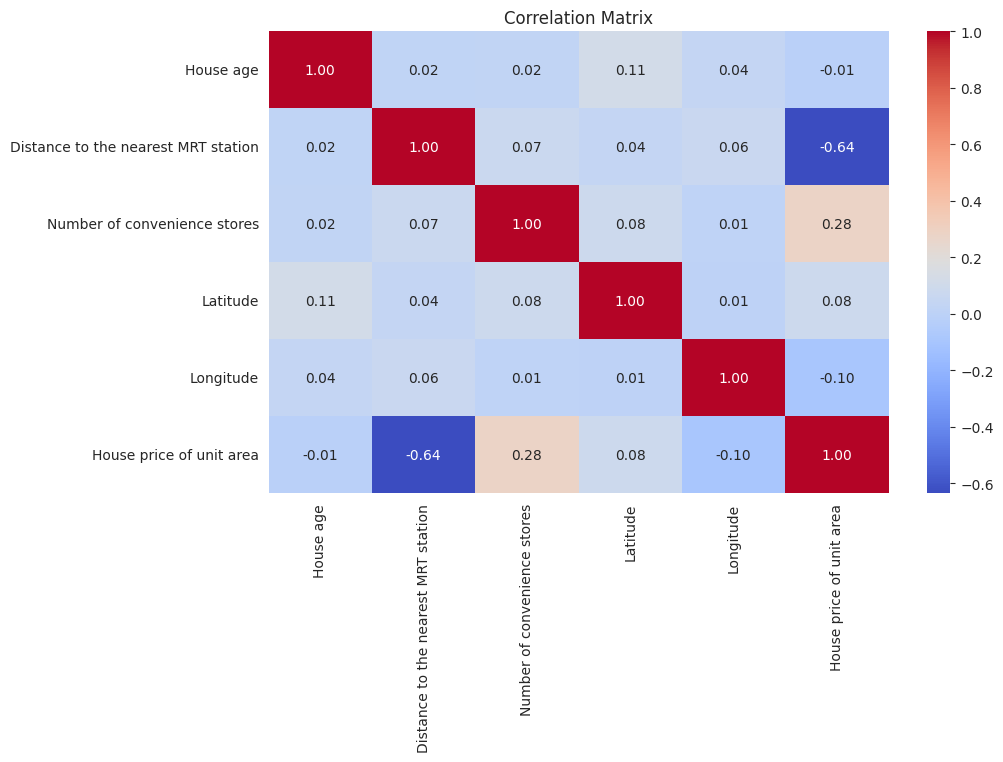

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [ ]:
corr_matrix= cols.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
print(corr_matrix)

In [ ]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


# **Feature Engineering**

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['House price of unit area','Transaction date'])
y=df['House price of unit area']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=43)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

trf1=ColumnTransformer([
    ('scaler',StandardScaler(),slice(0,5))
],remainder='passthrough')



/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


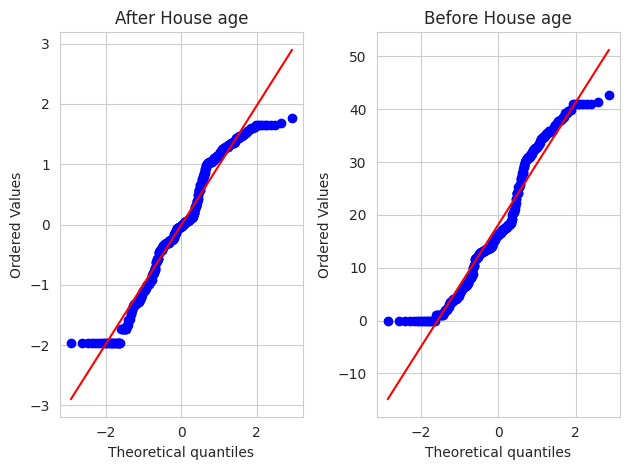

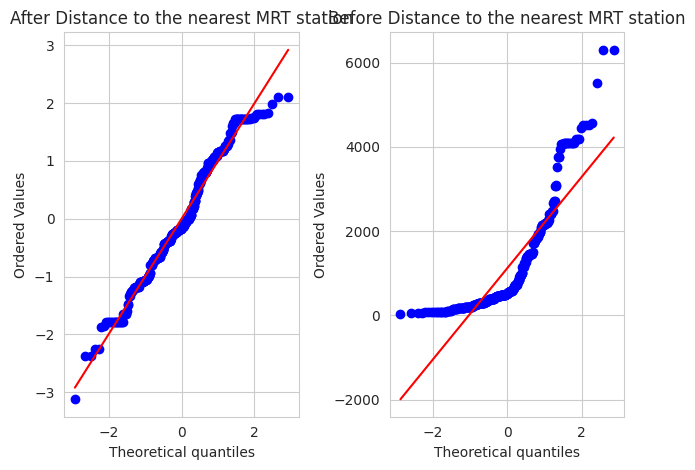

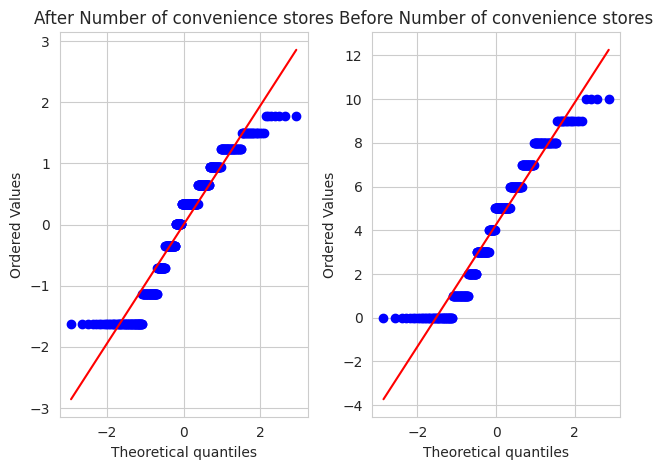

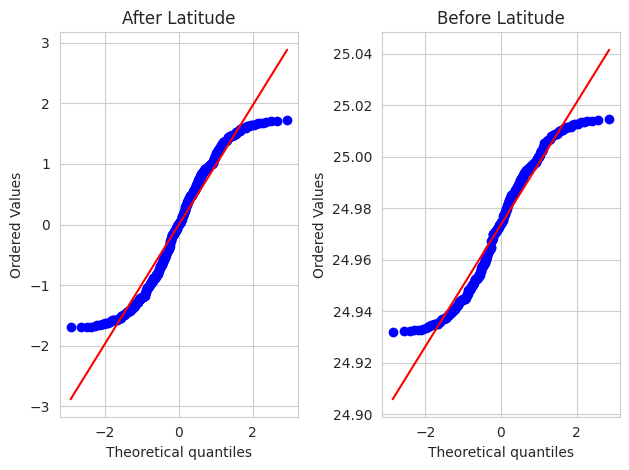

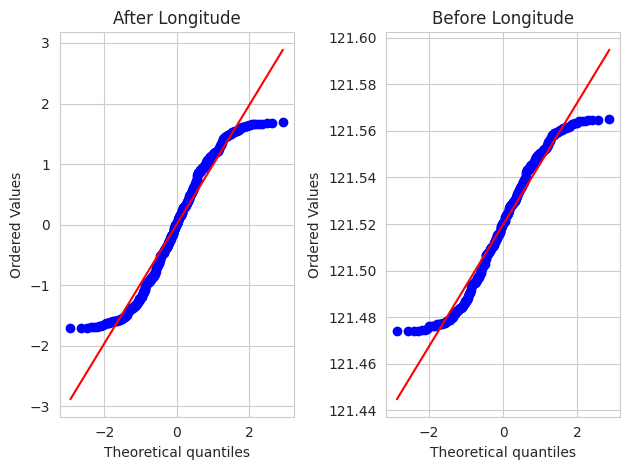

In [ ]:
import numpy as np
from sklearn.preprocessing import PowerTransformer,FunctionTransformer
from scipy.stats import probplot

pt=PowerTransformer()
trf=pt.fit_transform(x)
x_train_trf=pd.DataFrame(trf,columns=x.columns)
for col in x_train_trf.columns:
  plt.subplot(121)
  probplot(x_train_trf[col],plot=plt,dist='norm')
  plt.title(f'After {col}')

  plt.subplot(122)
  probplot(x_train[col],plot=plt,dist='norm')
  plt.title(f'Before {col}')
  plt.tight_layout()
  plt.show()

In [ ]:
trf2=ColumnTransformer([
    ('pt',PowerTransformer(),slice(0,5))
],remainder='passthrough')

In [ ]:
for col in x_train.columns:
  print(f'{col} : {x_train[col].skew()}')

House age : 0.30794587070901835
Distance to the nearest MRT station : 1.7466120147960436
Number of convenience stores : 0.01411663995243337
Latitude : -0.05950168979620598
Longitude : -0.04556314273317435


In [ ]:
def outlierRemoval(df):

  df=pd.DataFrame(df)
  numeric_cols=df.select_dtypes(include=['number']).columns

  for col in numeric_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    df[col]=df[col].clip(lower=lower_bound,upper=upper_bound)
  return df


iqr_trf=FunctionTransformer(outlierRemoval,validate=False)

trf3=ColumnTransformer([
    ('iqr',iqr_trf,slice(0,5))
],remainder='passthrough')

In [ ]:
pipe=Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [ ]:
x_train=pipe.fit_transform(x_train)
x_test=pipe.transform(x_test)

# *Model Training*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.36294571206942705
MSE 132.02237480451612


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeRegressor()
param_grid={
    'criterion':['squared_error','absolute_error','poisson','friedman_mse'],
    'splitter':['best','random'],
    'max_depth':[None,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[4,5,6,7,10],
    'max_features':[None,'log2','sqrt']
}
cv=GridSearchCV(dt,param_grid,cv=5)
cv.fit(x_train,y_train)

y_pred=cv.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))

R2 score 0.43476182908966843
MSE 117.13928791870178
